<AxesSubplot: >

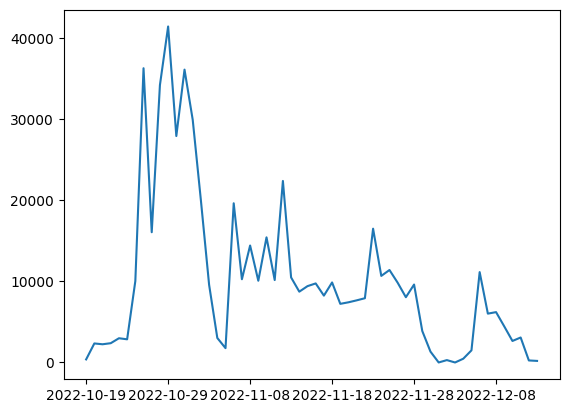

In [46]:
#CREAZIONE DI UN GRAFICO CHE RAPPRESENTA IL NUMERO DI TWEET PER GIORNO
import pandas as pd
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\tt.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['created_at'].str[:-9].value_counts().sort_index().plot(kind='line')

POSITIVE WORDS



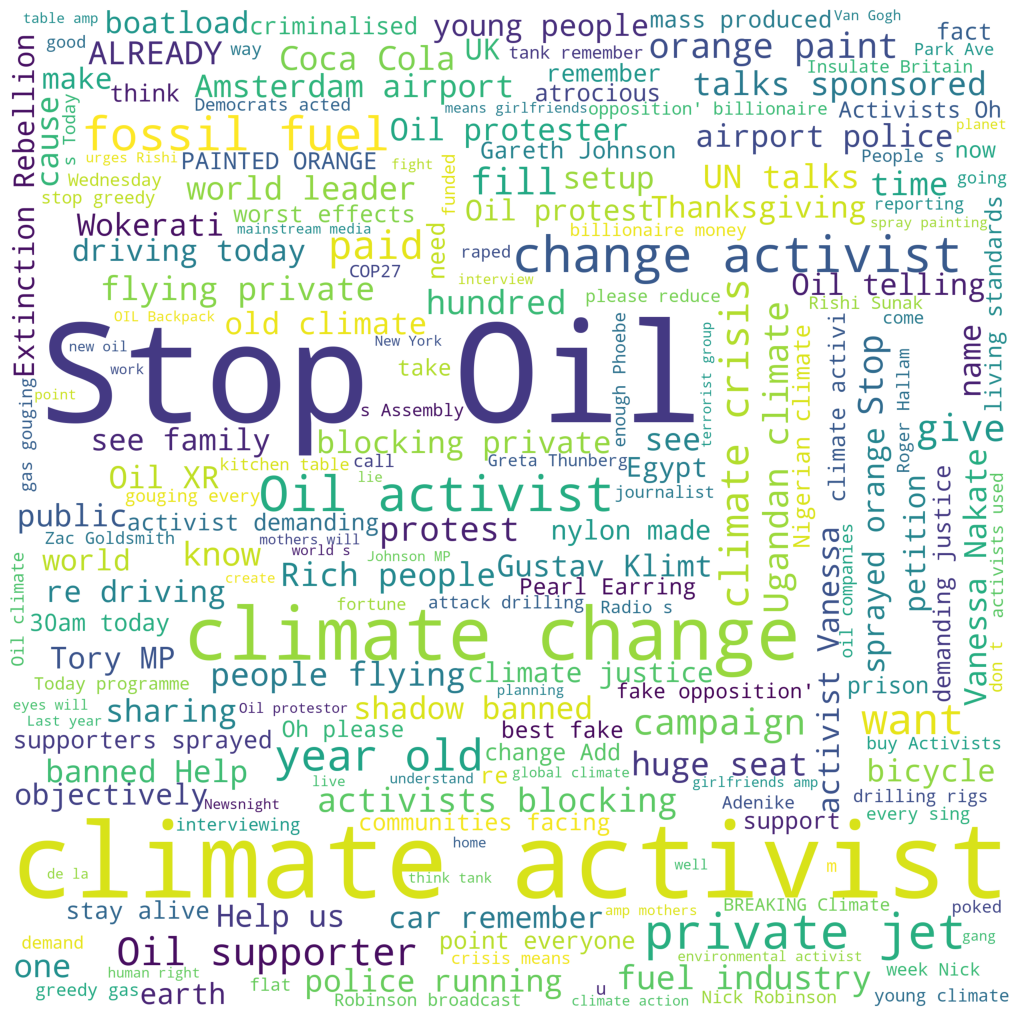

NEGATIVE WORDS



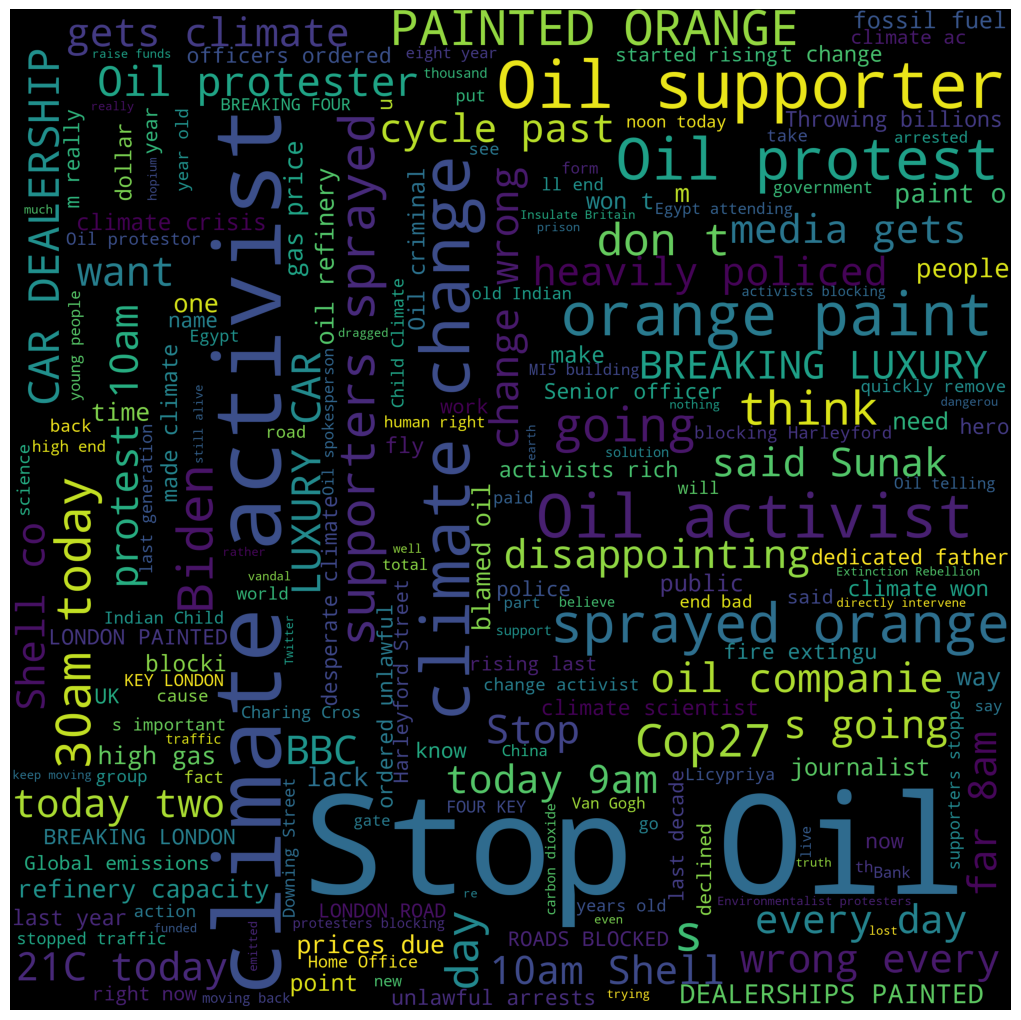

In [47]:
#CREAZIONE DI WORDCLOUD PER I TWEET POSITIVI E NEGATIVI DAL FILE CON I SENTIMENTI RICAVATI DA EXCEL
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
ttoadf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttoa.csv")

data = ttoadf[['tweet_text','Sentiment']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

#rimozione sentimenti neutrali
train = train[train.Sentiment != "neutral"]

train_pos = train[ train['Sentiment'] == 'positive']
train_pos_text = train_pos['tweet_text']

train_neg = train[ train['Sentiment'] == 'negative']
train_neg_text = train_neg['tweet_text']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("POSITIVE WORDS\n")
wordcloud_draw(train_pos_text, 'white')
print("NEGATIVE WORDS\n")
wordcloud_draw(train_neg_text, 'black')

In [ ]:
# PEZZO DI CODICE PER SENTIMENTAL ANALYSIS CON TEXTBLOB E CREAZIONE DI UN NUOVO CSV CON I SENTIMENTI
import pandas as pd
import textblob
from textblob import TextBlob
ttdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttNoCol.csv", dtype = {'created_at':'str'}, low_memory=False )

ttdf['full_text'] = ttdf['full_text'].astype(str)
ttdf['Sentiment'] = ttdf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
ttdf['Sentiment'] = ttdf['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpy.csv", index=False)

In [ ]:
# PEZZO DI CODICE PER CREAZIONE DI UN FILE CSV PARTENDO DA XLSX IN PYTHON
import pandas as pd
import textblob
from textblob import TextBlob
ttdf = pd.read_excel("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\SocialNetworkAnalysisProject\\Dataframes\\xlsx\\TweetTotali.xlsx")

ttdf['full_text'] = ttdf['full_text'].astype(str)
ttdf['Sentiment'] = ttdf['full_text'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)
ttdf['Sentiment'] = ttdf['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", index=False)

<AxesSubplot: >

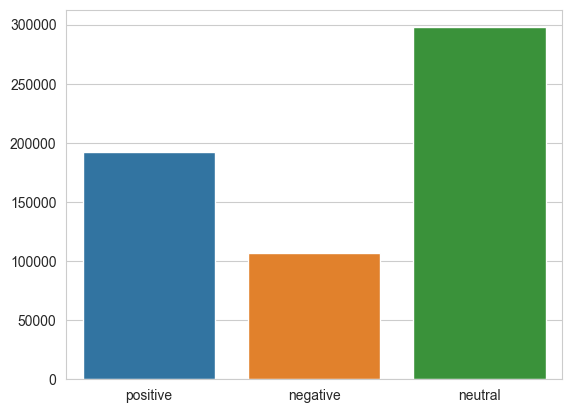

In [50]:
#CREARE BARPLOT DI TUTTI I TWEET

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tweettotdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", dtype = {'created_at':'str'}, low_memory=False )

pos = tweettotdf['Sentiment'].value_counts()['positive']
neg = tweettotdf['Sentiment'].value_counts()['negative']
neu = tweettotdf['Sentiment'].value_counts()['neutral']

sns.set_style("whitegrid")
sns.barplot(x=['positive','negative','neutral'], y=[pos,neg,neu])


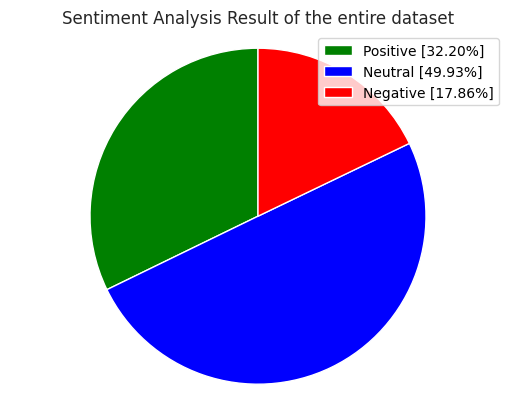

In [51]:
#PIE CHART DI TUTTI I TWEET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tweettotdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", dtype = {'created_at':'str'}, low_memory=False )
Positive = tweettotdf['Sentiment'].value_counts()['positive']
Negative = tweettotdf['Sentiment'].value_counts()['negative']
Neutral = tweettotdf['Sentiment'].value_counts()['neutral']

labels = ["Positive ["+str((Positive/596374)*100)[:-12]+"%]" , "Neutral ["+str((Neutral/596374)*100)[:-13]+"%]","Negative ["+str((Negative/596374)*100)[:-12]+"%]"]
sizes = [Positive, Neutral, Negative]
colors = ["green", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result of the entire dataset")
plt.axis("equal")
plt.show()

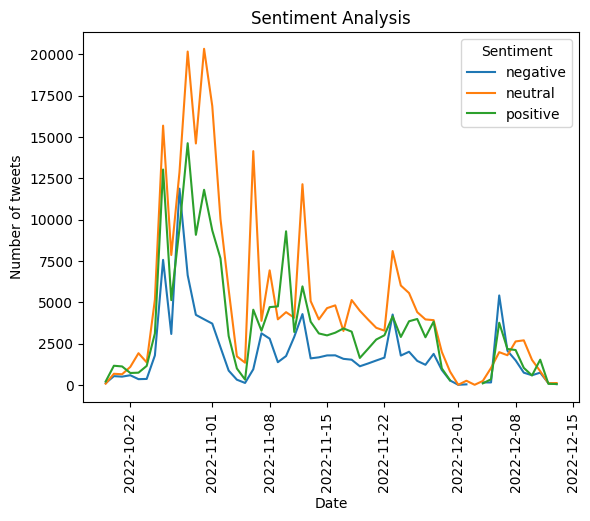

In [52]:
#3 LINES CHART DAL FILE TWEET TOTALI CSV FATTO CON PYTHON
import matplotlib.pyplot as plt
tweettotdf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\TweetTotali_py.csv", dtype = {'created_at':'str'}, low_memory=False )

tweettotdf['date'] = pd.to_datetime(tweettotdf['created_at']).dt.date
plot = tweettotdf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)


In [ ]:
#PULIZIA DATASET
'''
ttdf.drop('in_reply_to_status_id',axis=1, inplace=True)
ttdf.drop('in_reply_to_status_id_str',axis=1, inplace=True)
ttdf.drop('in_reply_to_user_id',axis=1, inplace=True)
ttdf.drop('in_reply_to_user_id_str',axis=1, inplace=True)
ttdf.drop('retweeted_status',axis=1, inplace=True)
ttdf.drop('withheld_in_countries',axis=1, inplace=True)
ttdf.drop('quoted_status_id',axis=1, inplace=True)
ttdf.drop('quoted_status_id_str',axis=1, inplace=True)
ttdf.drop('quoted_status',axis=1, inplace=True)
'''
ttdf.head()
ttdf.to_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpyNoCol.csv", index=False)

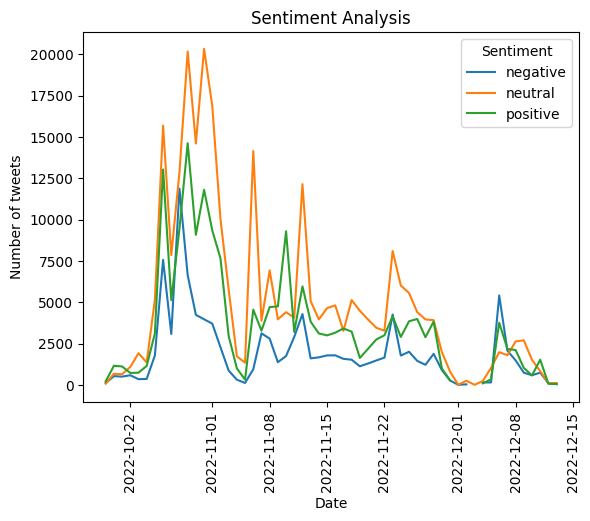

In [53]:
#3 LINE CHART CON SENTIMENTI DEL DATASET COMPLETO TTPY (IL FILE UTILIZZATO ERA STATO CONVERTITO TRAMITE RSTUDIO)
import matplotlib.pyplot as plt
ttpydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\ttpyNoCol.csv", dtype = {'created_at':'str'}, low_memory=False )

ttpydf['date'] = pd.to_datetime(ttpydf['created_at']).dt.date
plot = ttpydf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)


<AxesSubplot: >

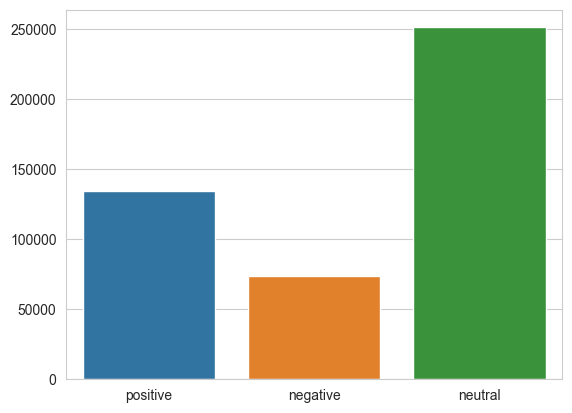

In [54]:
#CREARE BARPLOT DEI TWEET MIRATI CON PYTHON

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )

pos = mtspydf['Sentiment'].value_counts()['positive']
neg = mtspydf['Sentiment'].value_counts()['negative']
neu = mtspydf['Sentiment'].value_counts()['neutral']

sns.set_style("whitegrid")
sns.barplot(x=['positive','negative','neutral'], y=[pos,neg,neu])


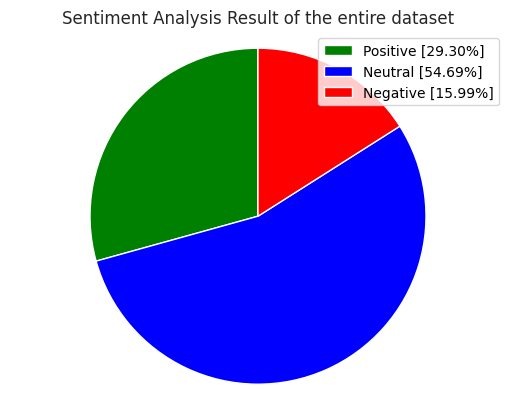

In [55]:
#PIE CHART DEI TWEET MIRATI CON PYTHON
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )
Positive = mtspydf['Sentiment'].value_counts()['positive']
Negative = mtspydf['Sentiment'].value_counts()['negative']
Neutral = mtspydf['Sentiment'].value_counts()['neutral']

labels = ["Positive ["+str((Positive/459488)*100)[:-13]+"%]" , "Neutral ["+str((Neutral/459488)*100)[:-12]+"%]","Negative ["+str((Negative/459488)*100)[:-13]+"%]"]
sizes = [Positive, Neutral, Negative]
colors = ["green", "blue","red"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use("default")
plt.legend(labels)
plt.title("Sentiment Analysis Result of the entire dataset")
plt.axis("equal")
plt.show()

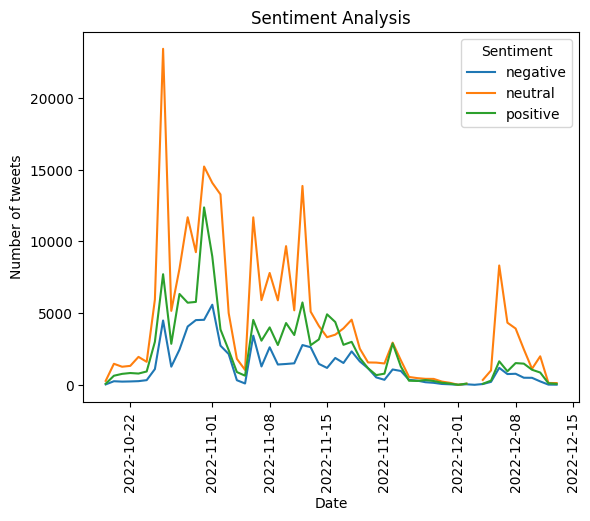

In [56]:
#3 LINE CHART CON SENTIMENTI DEL DATASET MTDF OSSIA QUELLO PIU MIRATO
import matplotlib.pyplot as plt
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv", dtype = {'created_at':'str'}, low_memory=False )
mtspydf['date'] = pd.to_datetime(ttpydf['created_at']).dt.date
plot = mtspydf.groupby('date')['Sentiment'].value_counts().unstack().plot()
plot.set_title("Sentiment Analysis")
plot.set_ylabel("Number of tweets")
plot.set_xlabel("Date")
plt.xticks(rotation=90)
plt.show(plot)

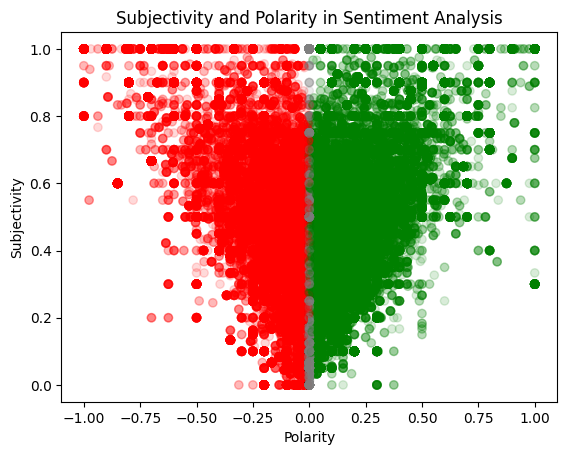

In [57]:
#SCATTER PLOT DI POLARITA E SOGGETTIVITA DEI TWEET MIRATI CON PYTHON
import matplotlib.pyplot as plt
import pandas as pd
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv", dtype = {'created_at':'str'}, low_memory=False )
mtspydf.loc[mtspydf['Sentiment'] == 'positive', 'color'] = 'green'
mtspydf.loc[mtspydf['Sentiment'] == 'negative', 'color'] = 'red'
mtspydf.loc[mtspydf['Sentiment'] == 'neutral', 'color'] = 'grey'
plt.scatter(mtspydf['polarity'], mtspydf['score'], color=mtspydf['color'], alpha=0.15)
plt.title('Subjectivity and Polarity in Sentiment Analysis')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

NEUTRAL WORDS



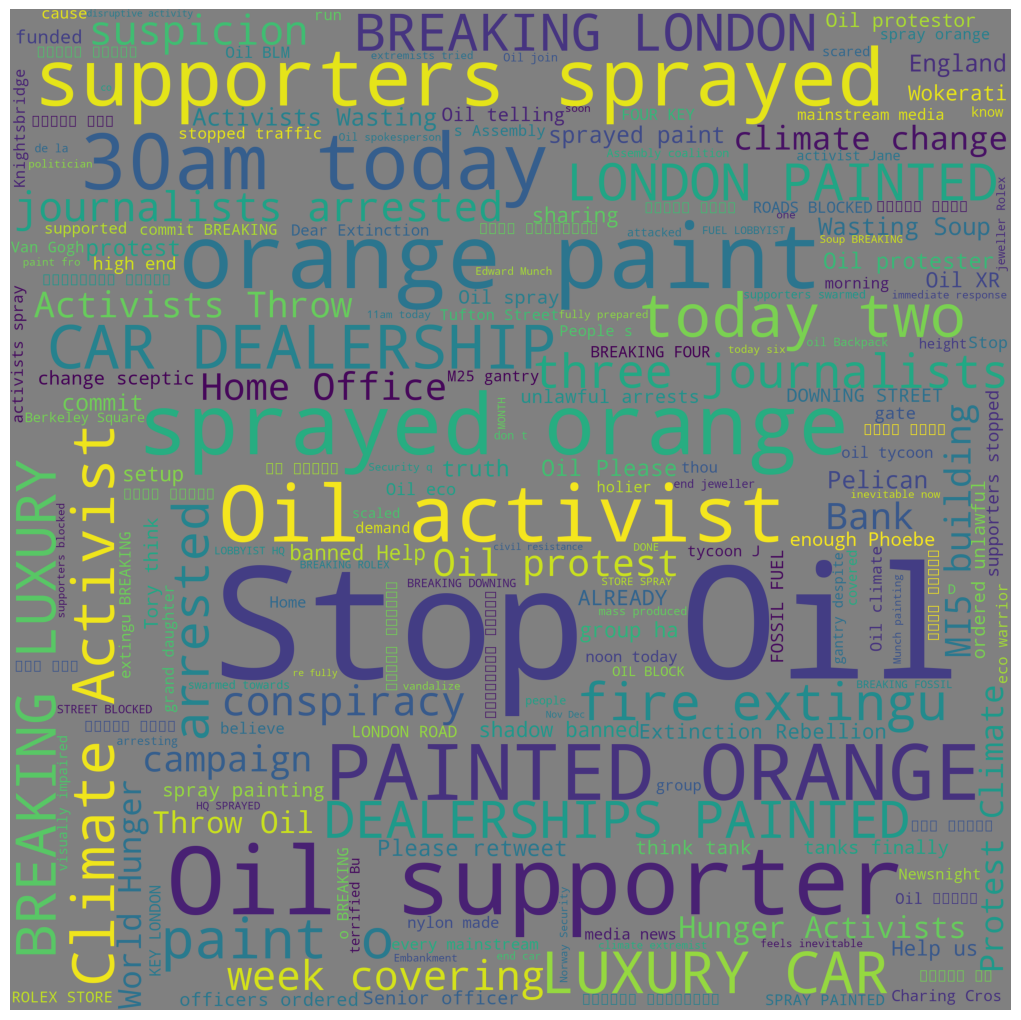

In [58]:
#CREAZIONE DI WORDCLOUD PER I TWEET NEUTRI
import sklearn
from sklearn.model_selection import train_test_split
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#WORDCLOUD
mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtspydf.csv")

data = mtspydf[['full_text','Sentiment']]

#split del dataset in trai e test
train,test = train_test_split(data, test_size = 0.1)

train_neu = train[ train['Sentiment'] == 'neutral']
train_neu_text = train_neu['full_text']


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                      if 'http' not in word
                      and not word.startswith('@')
                      and not word.startswith('#')
                      and word != 'RT'])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color = color,
                          width=2500,
                          height=2500).generate(cleaned_word)
    plt.figure(1, figsize=(13,13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("NEUTRAL WORDS\n")
wordcloud_draw(train_neu_text, 'grey')

In [59]:
#VISUALIZZAZIONE DELLE PRIME RIGHE DEL DATASET
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

mtspydf = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv", dtype = {'created_at':'str'}, low_memory=False )
mtspydf.head()

Unnamed: 0                     Source.Name           created_at  \
0           1  tweets_regarding_movement.xlsx  2022-10-26 13:07:46   
1           2  tweets_regarding_movement.xlsx  2022-10-26 12:26:11   
2           3  tweets_regarding_movement.xlsx  2022-10-26 12:15:53   
3           4  tweets_regarding_movement.xlsx  2022-10-26 12:03:01   
4           5  tweets_regarding_movement.xlsx  2022-10-26 11:44:36   

             id        id_str  \
0  1.585257e+18  1.585257e+18   
1  1.585246e+18  1.585246e+18   
2  1.585244e+18  1.585244e+18   
3  1.585241e+18  1.585241e+18   
4  1.585236e+18  1.585236e+18   

                                           full_text  truncated  \
0  @myldn Oil-based paint? 🤔🙄\r\r\r\n@JustStop_Oi...      False   
1  RT @Terror_Alarm: 🚨🇬🇧🎂 #JustStopOil activists ...      False   
2  @PaulBrown_UK Hey #JustStopOil you are stoppin...      False   
3  @JustStop_Oil @RishiSunak Wonderful courageous...      False   
4  RT @XRWorthing: The best answer to those criti...      False   

   display_text_range  entities  metadata  ... timestamp_ms  reply_count  \
0                 182       NaN       NaN  ...          NaN          NaN   
1                 140       NaN       NaN  ...          NaN          NaN   
2                 122       NaN       NaN  ...          NaN          NaN   
3                 254       NaN       NaN  ...          NaN          NaN   
4                 140       NaN       NaN  ...          NaN          NaN   

   filter_level  query  withheld_scope withheld_copyright  \
0           NaN    NaN             NaN                NaN   
1           NaN    NaN             NaN                NaN   
2           NaN    NaN             NaN                NaN   
3           NaN    NaN             NaN                NaN   
4           NaN    NaN             NaN                NaN   

   possibly_sensitive_appealable  Sentiment     score  polarity  
0                            NaN   negative  0.750000 -0.200000  
1                            NaN    neutral  0.000000  0.000000  
2                            NaN   negative  0.000000 -0.050000  
3                            NaN   positive  0.733333  0.583333  
4                            NaN   positive  0.300000  1.000000  

[5 rows x 48 columns]

###LAVORARE CON BIG DATA TRAMITE TERMINALE

- Dividere per 1000 righe
    split -l 1000 bigdata.csv
- Dividere per byte
    splot -b 50k bigdata.csv
- Dividere e usare un nome specifico
    split -l 1000 bigdata.csv ilmiofile

In [60]:
#Controllare la lunghezza del dataset con cui sto lavorando
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv")
   
print(len(df))

459488


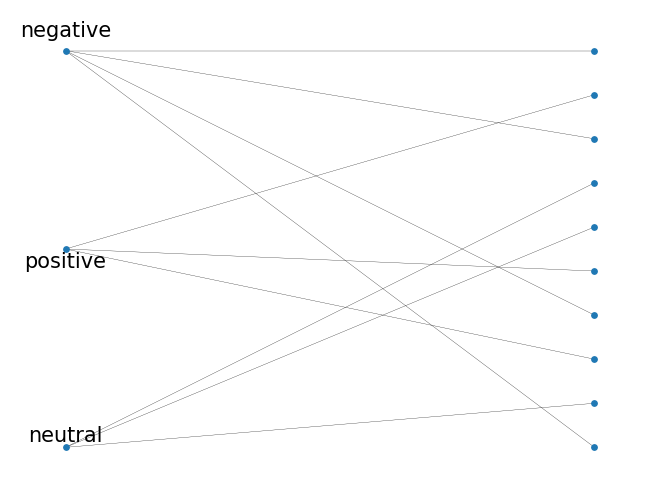

In [61]:
#GRAFO BIPARTITA DI UN ALTRO SUBSET DEL DATASET DEI PRIMI 100MILA TWEET
import networkx as nx
from networkx.algorithms import bipartite


dfSubset = df.head(10)

G1=nx.Graph()
G1.add_nodes_from(dfSubset['Sentiment'], bipartite=0, labels={})
G1.add_nodes_from(dfSubset['id'], bipartite=1, labels={})
G1.add_edges_from(dfSubset[['Sentiment','id']].values)
pos1 = nx.drawing.layout.bipartite_layout(G1, ['positive','neutral','negative'])
nx.draw(G1, pos1, with_labels=False, node_size=15, width=0.2)
pos1['neutral'] = (pos1['neutral'][0], pos1['neutral'][1]+0.03)
pos1['negative'] = (pos1['negative'][0], pos1['negative'][1]+0.05)
pos1['positive'] = (pos1['positive'][0], pos1['positive'][1]-0.03)
nx.draw_networkx_labels(G1, pos1, labels={'neutral': 'neutral', 'negative': 'negative', 'positive': 'positive'}, font_size=15)
plt.show()

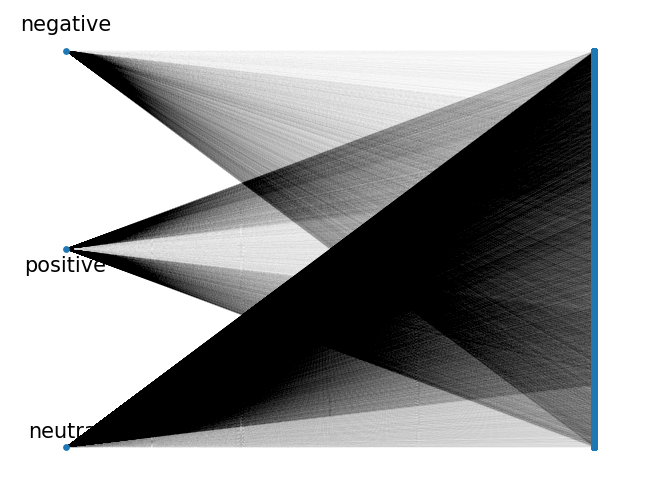

In [62]:
#GRAFO BIPARTITA DI UN ALTRO SUBSET DEL DATASET DEI PRIMI 100MILA TWEET
import networkx as nx
from networkx.algorithms import bipartite


dfSubset = df.head(100000)

G1=nx.Graph()
G1.add_nodes_from(dfSubset['Sentiment'], bipartite=0, labels={})
G1.add_nodes_from(dfSubset['id'], bipartite=1, labels={})
G1.add_edges_from(dfSubset[['Sentiment','id']].values)
pos1 = nx.drawing.layout.bipartite_layout(G1, ['positive','neutral','negative'])
nx.draw(G1, pos1, with_labels=False, node_size=15, width=0.001)
pos1['neutral'] = (pos1['neutral'][0], pos1['neutral'][1]+0.03)
pos1['negative'] = (pos1['negative'][0], pos1['negative'][1]+0.05)
pos1['positive'] = (pos1['positive'][0], pos1['positive'][1]-0.03)
nx.draw_networkx_labels(G1, pos1, labels={'neutral': 'neutral', 'negative': 'negative', 'positive': 'positive'}, font_size=15)
plt.show()

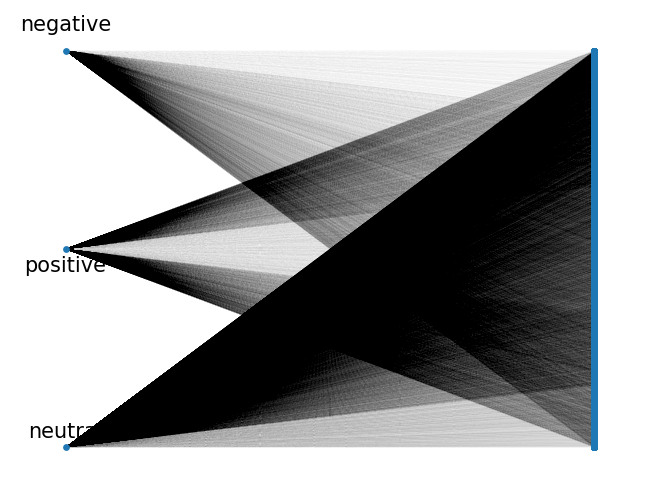

In [63]:
#GRAFO BIPARTITA DI UN ALTRO SUBSET DEL DATASET TRA I PRIMI 200MILA TWEET E I SUCCESSIVI 100MILA TWEET
df1Subset = df[200000:300000]

G1=nx.Graph()
G1.add_nodes_from(df1Subset['Sentiment'], bipartite=0, labels={})
G1.add_nodes_from(df1Subset['id'], bipartite=1, labels={})
G1.add_edges_from(df1Subset[['Sentiment','id']].values)
pos1 = nx.drawing.layout.bipartite_layout(G1, ['positive','neutral','negative'])
nx.draw(G1, pos1, with_labels=False, node_size=15, width=0.001)
pos1['neutral'] = (pos1['neutral'][0], pos1['neutral'][1]+0.03)
pos1['negative'] = (pos1['negative'][0], pos1['negative'][1]+0.05)
pos1['positive'] = (pos1['positive'][0], pos1['positive'][1]-0.03)
nx.draw_networkx_labels(G1, pos1, labels={'neutral': 'neutral', 'negative': 'negative', 'positive': 'positive'}, font_size=15)
plt.show()

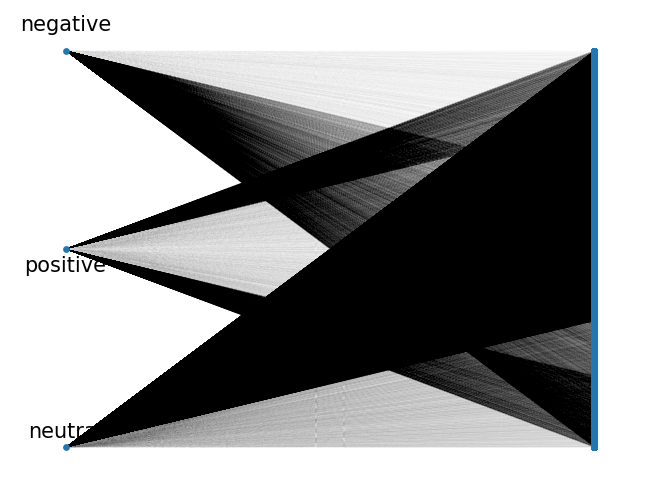

In [64]:
#GRAFO BIPARTITA DI UN ALTRO SUBSET DEL DATASET
dfTotSubset = df

G1=nx.Graph()
G1.add_nodes_from(dfTotSubset['Sentiment'], bipartite=0, labels={})
G1.add_nodes_from(dfTotSubset['id'], bipartite=1, labels={})
G1.add_edges_from(dfTotSubset[['Sentiment','id']].values)
pos1 = nx.drawing.layout.bipartite_layout(G1, ['positive','neutral','negative'])
nx.draw(G1, pos1, with_labels=False, node_size=15, width=0.0005)
pos1['neutral'] = (pos1['neutral'][0], pos1['neutral'][1]+0.03)
pos1['negative'] = (pos1['negative'][0], pos1['negative'][1]+0.05)
pos1['positive'] = (pos1['positive'][0], pos1['positive'][1]-0.03)
nx.draw_networkx_labels(G1, pos1, labels={'neutral': 'neutral', 'negative': 'negative', 'positive': 'positive'}, font_size=15)
plt.show()

c:\Users\Jimpo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


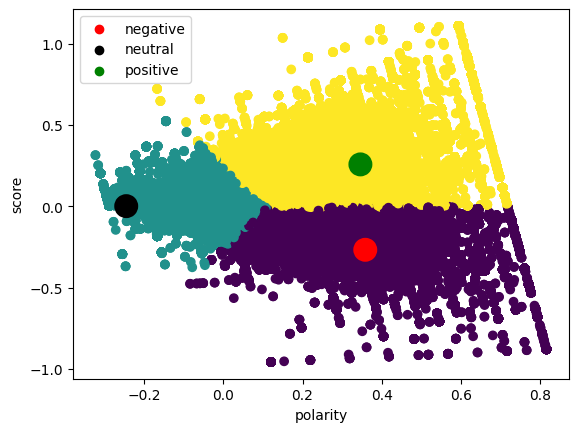

In [65]:
#CREAZIONE GRAFO CLUSTER
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

dfTot = df
#plot a projection of the data in 2D using PCA and the KMeans algorithm to cluster the data points into 3 clusters from the dataset df
pca = PCA(n_components=2).fit(dfTot[['polarity','score']])
pca_2d = pca.transform(dfTot[['polarity','score']])
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_2d)
#plot the clusters
plt.figure('K-means with 3 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
#assign each color to a sentiment label
colors = ['red', 'black', 'green']
labels = ['negative', 'neutral', 'positive']
#plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o', s=150, c=colors, linewidths=5, zorder=10)
#plot the labels for the centroids
for i, c in enumerate(colors):
    plt.scatter([], [], c=c, label=labels[i])
plt.legend()
#label the axes
plt.xlabel('polarity')
plt.ylabel('score')
plt.show()

In [ ]:
#PROIEZIONE DEI NODI POSITIVI
import pandas as pd

dftot = pd.read_csv('C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\tt.csv')
dftot.head()

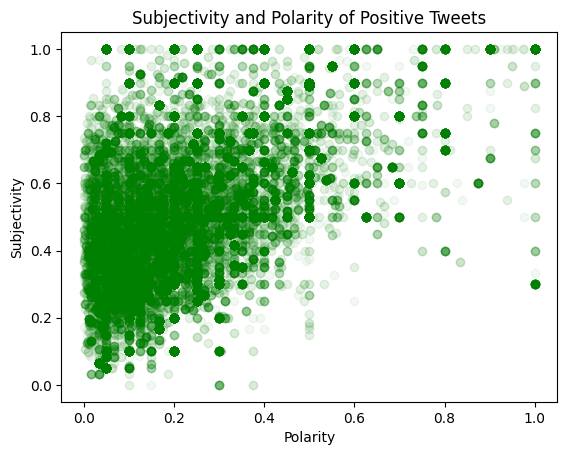

In [66]:
#SCATTER PLOT DI SENTIMENTI POSITIVI
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

dfTotPy = pd.read_csv('C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv')
dfpos = dfTotPy[dfTotPy['Sentiment'] == 'positive']
plt.scatter(dfpos['polarity'], dfpos['score'], color='green', alpha=0.05)
plt.title('Subjectivity and Polarity of Positive Tweets')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

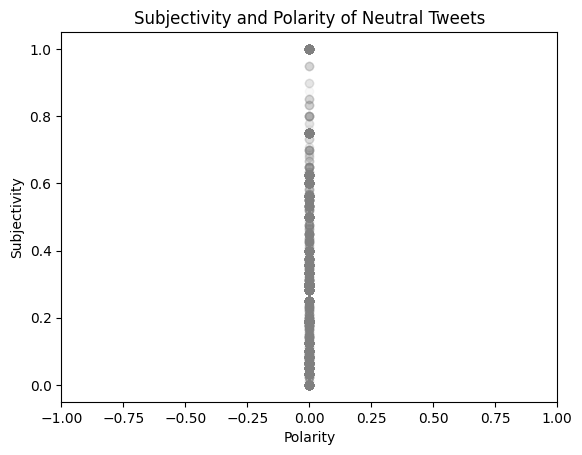

In [67]:
#SCATTER PLOT DI SENTIMENTI NEUTRI
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

dfTotPy = pd.read_csv('C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv')
dfpos = dfTotPy[dfTotPy['Sentiment'] == 'neutral']
plt.scatter(dfpos['polarity'], dfpos['score'], color='grey', alpha=0.05)
plt.xlim(-1, 1)
plt.title('Subjectivity and Polarity of Neutral Tweets')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

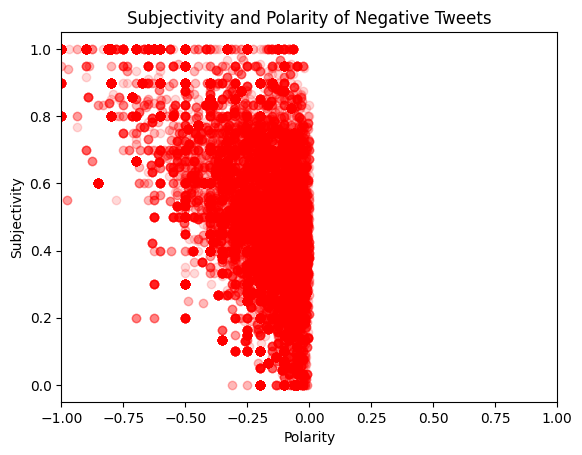

In [68]:
#SCATTER PLOT DI SENTIMENTI NEGATIVI
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

dfTotPy = pd.read_csv('C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv')
dfpos = dfTotPy[dfTotPy['Sentiment'] == 'negative']
plt.scatter(dfpos['polarity'], dfpos['score'], color='red', alpha=0.15)
plt.xlim(-1, 1)
plt.title('Subjectivity and Polarity of Negative Tweets')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

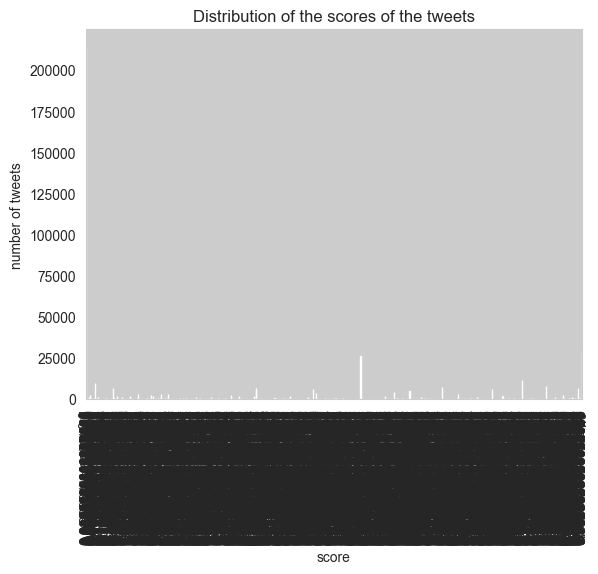

In [81]:
#GRAFICO CHE RAPPRESENTA IL NUMERO DI RIPETIZIONE DELLO SCORE

#plot the distribution of the scores of dfTotPy
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns

dfTotPy = pd.read_csv('C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv')
#plt.hist(dfTotPy['score'], bins=20, color='grey')
plot = dfTotPy.groupby('score').size().plot(kind='bar', color='grey')

plt.title('Distribution of the scores of the tweets')
plt.xlabel('score')
plt.ylabel('number of tweets')
plt.show()

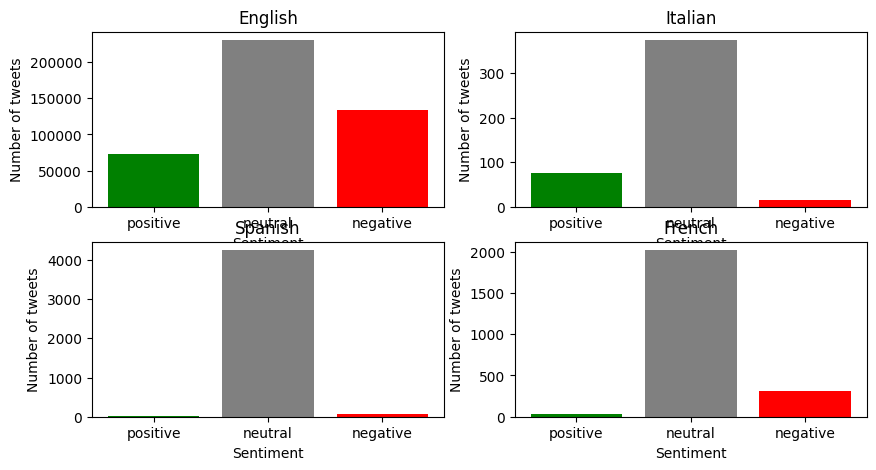

In [70]:
#GRAFICO CHE TIENE PIU GRAFICI INSIEME

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
#draw bar plot per sentiment per language in the same plot
dfTotPy = pd.read_csv('C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\mtsSubScorepydf.csv')
'''
#select the languages english, italian, spanish and french
dfTotPy = dfTotPy[dfTotPy['lang'].isin(['en', 'it', 'es', 'fr'])]
#set the width of the bars
width = 0.25
#set the position of the bars on the x-axis
ind = np.arange(len(dfTotPy.groupby('lang').count()['score']))
#set the figure size
plt.figure(figsize=(10, 5))
#set the title
plt.title('Number of tweets per sentiment per language')
#set the labels for the x-axis
plt.xticks(ind + width, ('English', 'Italian', 'Spanish', 'French'))
#set the labels for the y-axis
plt.ylabel('Number of tweets')
#set the labels for the legend
plt.legend(labels=['positive', 'neutral', 'negative'])
#plot the bars
plt.bar(ind, dfTotPy[dfTotPy['Sentiment'] == 'positive'].groupby('lang').count()['score'], width, color='green')
plt.bar(ind + width, dfTotPy[dfTotPy['Sentiment'] == 'neutral'].groupby('lang').count()['score'], width, color='grey')
plt.bar(ind + 2*width, dfTotPy[dfTotPy['Sentiment'] == 'negative'].groupby('lang').count()['score'], width, color='red')
plt.show()
'''

#create a single figure with 4 subplots of the sentiment per language
fig1 = plt.figure(figsize=(10, 5))

#add the first subplot of the english tweets
ax1 = fig1.add_subplot(221)
ax1.set_title('English')
ax1.set_ylabel('Number of tweets')
ax1.set_xlabel('Sentiment')
ax1.bar(['positive', 'neutral', 'negative'], dfTotPy[dfTotPy['lang'] == 'en'].groupby('Sentiment').count()['score'], color=['green', 'grey', 'red'])

#add the second subplot of the italian tweets
ax2 = fig1.add_subplot(222)
ax2.set_title('Italian')
ax2.set_ylabel('Number of tweets')
ax2.set_xlabel('Sentiment')
ax2.bar(['positive', 'neutral', 'negative'], dfTotPy[dfTotPy['lang'] == 'it'].groupby('Sentiment').count()['score'], color=['green', 'grey', 'red'])

#add the third subplot of the spanish tweets
ax3 = fig1.add_subplot(223)
ax3.set_title('Spanish')
ax3.set_ylabel('Number of tweets')
ax3.set_xlabel('Sentiment')
ax3.bar(['positive', 'neutral', 'negative'], dfTotPy[dfTotPy['lang'] == 'es'].groupby('Sentiment').count()['score'], color=['green', 'grey', 'red'])

#add the fourth subplot of the french tweets
ax4 = fig1.add_subplot(224)
ax4.set_title('French')
ax4.set_ylabel('Number of tweets')
ax4.set_xlabel('Sentiment')
ax4.bar(['positive', 'neutral', 'negative'], dfTotPy[dfTotPy['lang'] == 'fr'].groupby('Sentiment').count()['score'], color=['green', 'grey', 'red'])
 
plt.show()


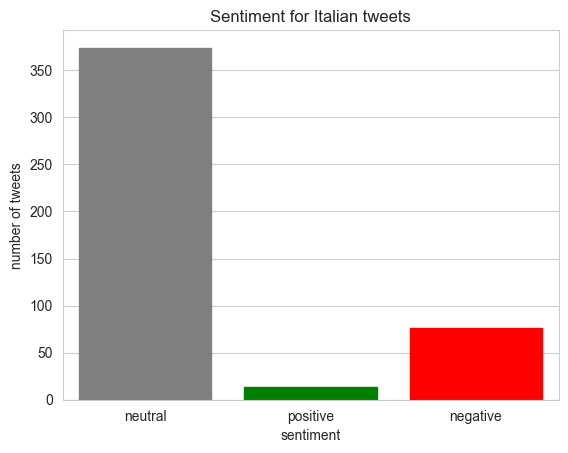

In [71]:
#BARPLOT PER I TWEET ITALIANI
import seaborn as sns
dfIt = dfTotPy[dfTotPy['lang'] == 'it']
#get each sentiment counts for dfIt
posit = dfIt['Sentiment'].value_counts()['positive']
negit = dfIt['Sentiment'].value_counts()['negative']
neuit = dfIt['Sentiment'].value_counts()['neutral']
#plot the barplot
sns.set_style("whitegrid")
sns.barplot(x=['neutral','positive','negative'], y=[neuit, posit, negit])
#change bar colors to grey, green, red
plt.gca().patches[0].set_color('grey')
plt.gca().patches[1].set_color('green')
plt.gca().patches[2].set_color('red')
plt.title('Sentiment for Italian tweets')
plt.xlabel('sentiment')
plt.ylabel('number of tweets')
plt.show()

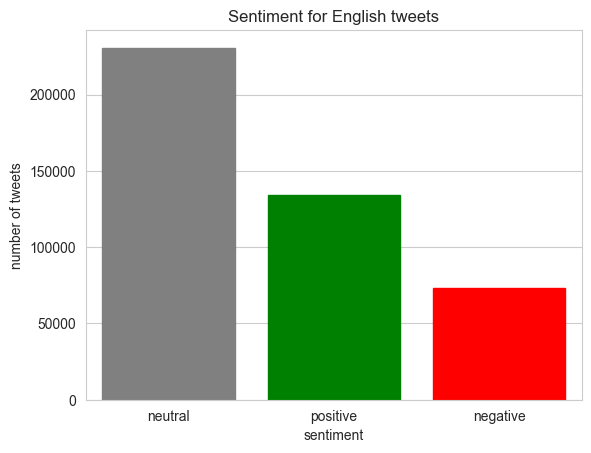

In [72]:
#BARPLOT PER I TWEET INGLESI
import seaborn as sns
dfEn = dfTotPy[dfTotPy['lang'] == 'en']
#get each sentiment counts for dfEn
posen = dfEn['Sentiment'].value_counts()['positive']
negen = dfEn['Sentiment'].value_counts()['negative']
neuen = dfEn['Sentiment'].value_counts()['neutral']
#plot the barplot
sns.set_style("whitegrid")
sns.barplot(x=['neutral','positive','negative'], y=[neuen, posen, negen])
#change bar colors to grey, green, red
plt.gca().patches[0].set_color('grey')
plt.gca().patches[1].set_color('green')
plt.gca().patches[2].set_color('red')
plt.title('Sentiment for English tweets')
plt.xlabel('sentiment')
plt.ylabel('number of tweets')
plt.show()

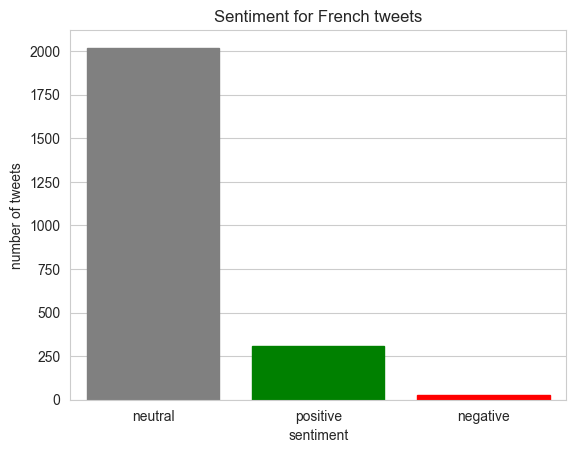

In [73]:
#BARPLOT PER I TWEET FRANCESI
import seaborn as sns
dfFr = dfTotPy[dfTotPy['lang'] == 'fr']
#get each sentiment counts for dfFr
posfr = dfFr['Sentiment'].value_counts()['positive']
negfr = dfFr['Sentiment'].value_counts()['negative']
neufr = dfFr['Sentiment'].value_counts()['neutral']
#plot the barplot
sns.set_style("whitegrid")
sns.barplot(x=['neutral','positive','negative'], y=[neufr, posfr, negfr])
#change bar colors to grey, green, red
plt.gca().patches[0].set_color('grey')
plt.gca().patches[1].set_color('green')
plt.gca().patches[2].set_color('red')
plt.title('Sentiment for French tweets')
plt.xlabel('sentiment')
plt.ylabel('number of tweets')
plt.show()

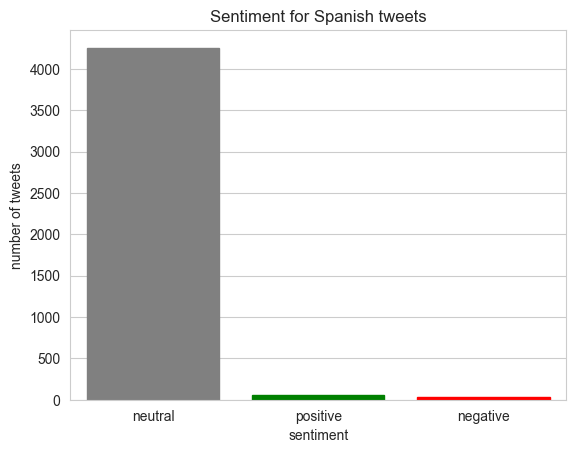

In [74]:
#BARPLOT PER I TWEET SPAGNOLI
import seaborn as sns
dfEs = dfTotPy[dfTotPy['lang'] == 'es']
#get each sentiment counts for dfEs
poses = dfEs['Sentiment'].value_counts()['positive']
neges = dfEs['Sentiment'].value_counts()['negative']
neues = dfEs['Sentiment'].value_counts()['neutral']
#plot the barplot
sns.set_style("whitegrid")
sns.barplot(x=['neutral','positive','negative'], y=[neues, poses, neges])
#change bar colors to grey, green, red
plt.gca().patches[0].set_color('grey')
plt.gca().patches[1].set_color('green')
plt.gca().patches[2].set_color('red')
plt.title('Sentiment for Spanish tweets')
plt.xlabel('sentiment')
plt.ylabel('number of tweets')
plt.show()

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_20028\2681787025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfIt.loc[dfIt['Sentiment'] == 'positive', 'color'] = 'green'


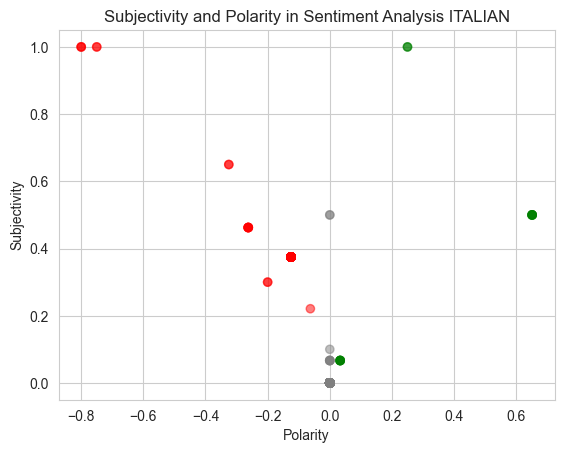

In [75]:
#ITALIAN SCATTERPLOT
import matplotlib.pyplot as plt
import pandas as pd
dfIt.loc[dfIt['Sentiment'] == 'positive', 'color'] = 'green'
dfIt.loc[dfIt['Sentiment'] == 'negative', 'color'] = 'red'
dfIt.loc[dfIt['Sentiment'] == 'neutral', 'color'] = 'grey'
plt.scatter(dfIt['polarity'], dfIt['score'], color=dfIt['color'], alpha=0.5)
plt.title('Subjectivity and Polarity in Sentiment Analysis ITALIAN')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_20028\3474404292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEn.loc[dfEn['Sentiment'] == 'positive', 'color'] = 'green'


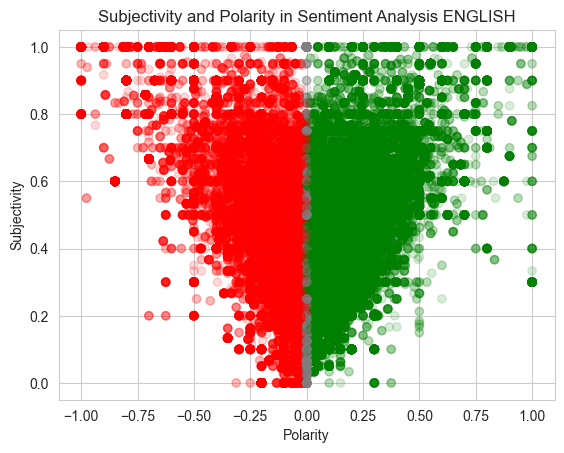

In [76]:
#ENGLISH SCATTERPLOT
import matplotlib.pyplot as plt
import pandas as pd
dfEn.loc[dfEn['Sentiment'] == 'positive', 'color'] = 'green'
dfEn.loc[dfEn['Sentiment'] == 'negative', 'color'] = 'red'
dfEn.loc[dfEn['Sentiment'] == 'neutral', 'color'] = 'grey'
plt.scatter(dfEn['polarity'], dfEn['score'], color=dfEn['color'], alpha=0.15)
plt.title('Subjectivity and Polarity in Sentiment Analysis ENGLISH')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_20028\1167025283.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFr.loc[dfFr['Sentiment'] == 'positive', 'color'] = 'green'


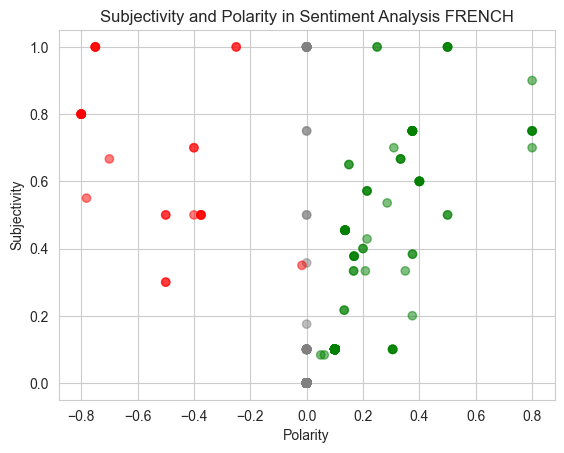

In [77]:
#FRENCH SCATTERPLOT
import matplotlib.pyplot as plt
import pandas as pd
dfFr.loc[dfFr['Sentiment'] == 'positive', 'color'] = 'green'
dfFr.loc[dfFr['Sentiment'] == 'negative', 'color'] = 'red'
dfFr.loc[dfFr['Sentiment'] == 'neutral', 'color'] = 'grey'
plt.scatter(dfFr['polarity'], dfFr['score'], color=dfFr['color'], alpha=0.5)
plt.title('Subjectivity and Polarity in Sentiment Analysis FRENCH')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

C:\Users\Jimpo\AppData\Local\Temp\ipykernel_20028\3683514563.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfEs.loc[dfEs['Sentiment'] == 'positive', 'color'] = 'green'


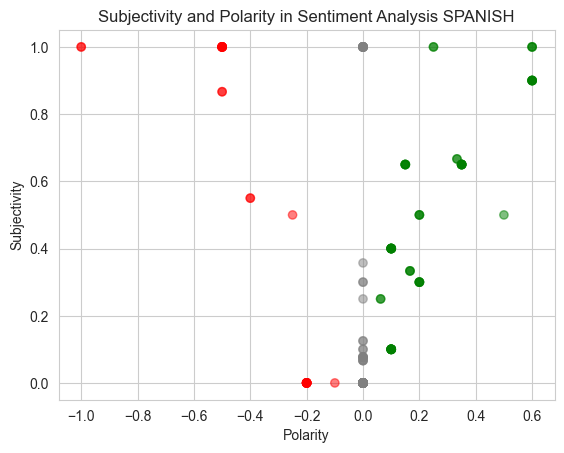

In [78]:
#SPANISH SCATTERPLOT
import matplotlib.pyplot as plt
import pandas as pd
dfEs.loc[dfEs['Sentiment'] == 'positive', 'color'] = 'green'
dfEs.loc[dfEs['Sentiment'] == 'negative', 'color'] = 'red'
dfEs.loc[dfEs['Sentiment'] == 'neutral', 'color'] = 'grey'
plt.scatter(dfEs['polarity'], dfEs['score'], color=dfEs['color'], alpha=0.5)
plt.title('Subjectivity and Polarity in Sentiment Analysis SPANISH')
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

c:\Users\Jimpo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


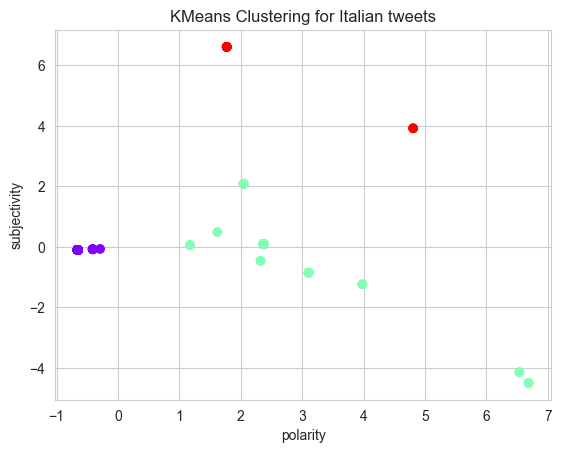

In [79]:
#CREATE CLUSTERING GRAPH FOR ITALIAN TWEETS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score

#select only the columns we need
dfItCl = dfIt[['polarity','score','Sentiment']]
#replace the sentiment with numbers
dfItCl.loc[dfItCl['Sentiment'] == 'positive', 'Sentiment'] = 1
dfItCl.loc[dfItCl['Sentiment'] == 'negative', 'Sentiment'] = 2
dfItCl.loc[dfItCl['Sentiment'] == 'neutral', 'Sentiment'] = 3
#convert the dataframe to a numpy array
X = dfItCl.to_numpy()
#standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
#perform KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
#plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('KMeans Clustering for Italian tweets')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

c:\Users\Jimpo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


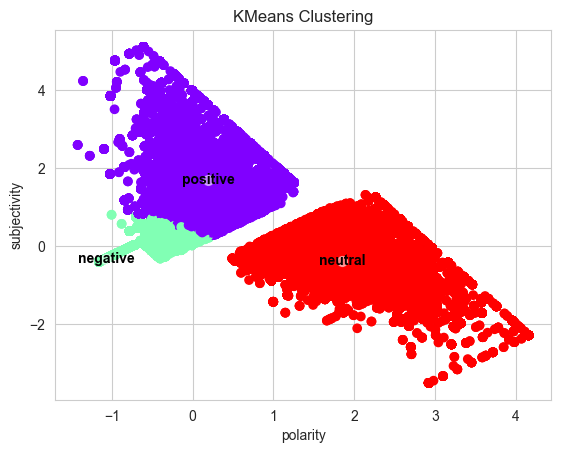

In [80]:
#CREATE CLUSTERING GRAPH FOR ENGLISH TWEETS
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import mutual_info_score
from sklearn.metrics import normalized_mutual_info_score
import matplotlib.patches as mpatches

#select only the columns we need
dfCl = df[['polarity','score','Sentiment']]
#replace the sentiment with numbers
dfCl.loc[dfCl['Sentiment'] == 'positive', 'Sentiment'] = 1
dfCl.loc[dfCl['Sentiment'] == 'negative', 'Sentiment'] = 2
dfCl.loc[dfCl['Sentiment'] == 'neutral', 'Sentiment'] = 3
#convert the dataframe to a numpy array
X = dfCl.to_numpy()
#standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
#perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
#perform KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
#plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='rainbow')
#create centroids
centroids = kmeans.cluster_centers_
#add labels to the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='white', s=50, alpha=0.5)
plt.text(centroids[0, 0], centroids[0, 1], 'positive', ha='center', va='center', fontsize=10, color='black', fontweight='bold')
plt.text(centroids[1, 0], centroids[1, 1], 'negative', ha='center', va='center', fontsize=10, color='black', fontweight='bold')
plt.text(centroids[2, 0], centroids[2, 1], 'neutral', ha='center', va='center', fontsize=10, color='black', fontweight='bold')



plt.title('KMeans Clustering')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [ ]:
#SETTING OAUTH
import tweepy
import configparser

#Twitter API credentials
config = configparser.ConfigParser()
config.read("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\APIkeys\\config.ini")

api_key = config['twitter']['api_key_r']
api_secret_key = config['twitter']['api_secret_key_r']
access_token = config['twitter']['access_token_r']
access_token_secret = config['twitter']['access_token_secret_r']

#authenticate
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [ ]:
#FUNCTION THAT RETURNS THE JSON FORMAT OF A USER WHO RETWEETED A TWEET
import json

def get_user_ids_by_retweets(tweet_id):

    # get client with token
    bearer_token ="AAAAAAAAAAAAAAAAAAAAAOQ6VwEAAAAAtGKOf6bobogb5JEWiF6bmLmLkuA%3D5R9TCklAx9It9mBq87sXiieuBn9GzpexGmKBXviw8enl88AzYR"
    client = tweepy.Client(bearer_token=bearer_token)

    listUser = []
    # get first paging retweet users
    retweeters = client.get_retweeters(id=tweet_id)
    for retweeter in retweeters.data:
        listUser.append({
            "name": retweeter.name,
            "id": retweeter.id,
            "username": retweeter.username
        })    
    next_token = retweeters.meta['next_token']

    # get til end of paging retweet users
    while next_token != None:
        retweeters = client.get_retweeters(id=tweet_id, pagination_token=next_token)
        if retweeters.data is not None:
            for retweeter in retweeters.data:
                listUser.append({
                    "name": retweeter.name,
                    "id": retweeter.id,
                    "username": retweeter.username
                })    
            next_token = retweeters.meta['next_token']
        else:
            next_token = None

    return listUser

def obj_dict(obj):
    return obj.__dict__

'''
tweet_id="1582388225049780230"

listUser = get_user_ids_by_retweets(tweet_id)
print(json.dumps(listUser, indent=4, default=obj_dict))
'''

In [ ]:
#OCCURRENCES TO ANALYZE

#PARIS LOUVRE MUSEUM 
    #Louvre paris, activist disguised as old woman throws a cake at the painting, 29th may 2022 //done
    #Keywords used: attivisti, climate activist, just stop oil, mona lisa, mona lisa cake, ultima generazione, last generation
    #Hashtag searched: #Louvre, #MonaLisa
    #Account analyzed: @JustStop_Oil
    #Total data retrieved: 559MB

#LONDON NATIONAL GALLERY OF ART
    #National gallery of art, activists throw soup and glue themselves to the wall, 14th october 2022 //done
    #Keywords used: Attivisti, just stop oil, van gogh, national gallery of art, climate activists, last generation
    #Hashtag searched: #VanGogh, #NationalGalleryOfArt
    #Account analyzed: @JustStop_Oil, @ngadc
    #Total data retrieved: 1.14GB

#ITALY UFFIZI GALLERY AND MILAN CAR EXHIBITION
    #Florence uffizi gallery, activists glue themselves on the paintings, 22/07/2022 //to do
    #Keywords used: attivisti, ultima generazione, uffizi, just stop oil, climate activist, botticelli
    #Hashtag searched: #Uffizi, #Botticelli
    #Account analyzed: @JustStop_Oil, @UffiziGalleries, @UltimaGenerazi1
    #Total data retrieved: 355MB

#EVENTO IN SPAGNA
    #Spain's prado museum, activists glue themselves on the paintings, 05/11/2022 //done
    #Keywords used: climate activist, last generation, just stop oil, prado museum, just stop oil, attivisti, francisco goya, activistas
    #Hashtag searched: #franciscogoya, #pradomuseum
    #Account analyzed: @museodelprado, @JustStop_Oil
    #Total data retrieved: 3.67GB

#TOTAL AMOUNT OF DATA RETRIEVED: 5.46GB
#also add user's opinion on the security of the museums that were attacked and how they feel about the paintings

In [ ]:
#QUERY USED TO SCRAPE TWEETS
import pandas as pd
import snscrape.modules.twitter as sntwitter

#scrape tweets from 2022-10-14 to 2022-10-29
query = "from:JustStop_Oil until:YYYY-MM-DD since:YYYY-MM-DD"
tweets = []

for tweet in sntwitter.TwitterSearchScraper(query).get_items():
     tweets.append(tweet)
     
#save tweets to a csv file
df = pd.DataFrame(tweets)
df.to_csv('directory', index=False)

In [ ]:
#GRAPHS TO DO

#1) Number of tweets per day
#2) Number of tweets per day for each account
#3) Bar plot of the sentiment analysis of the tweets for each event pre and post
#4) Plot of the sentiment analysis of the replies for each account pre and post
#5) Mention network of the users pre and post
#6) Clustering of the users pre and post
#other graphs to determine

In [ ]:
#GRAPH TEST

#put a csv file in a dataframe
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from pandas.io.json import json_normalize
import re
import inline
import metaknowledge as mk
import metaknowledge.contour.plotting as mkv

df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csv\\csvWithSNScrape\\MonaLisaCake_FR\\After\\SubDataframes\\attivistiAfterMonaLisa.csv")

#create a dataframe with user and mentionedUsers
df2 = df[['user', 'mentionedUsers']]

#replace the single quotes with double quotes without the regex
#df2=df2.replace({'\'': '"'}, regex=True)
#remove the square brackets from the mentionedUsers column
#df2['mentionedUsers'] = df2['mentionedUsers'].str.strip('[]').astype(str)

#FINDS ALL THE USERNAMES
#mentioned_users = re.findall("username': '(.*?)'", df2['user'][10])

#return the first 10 usernames of the dataframe user column
#for i in df2['user'][0:10]:
#    print(re.findall("username': '(.*?)'", i))

#transformed the dataframe by removing the square brackets from the mentionedUsers column and replacing the single quotes with double quotes
#now the data can be parsed as json

#G = nx.DiGraph()

#create a mention network with the previous function of the dataframe

'''
#create a mention network with the previous function of the dataframe
for i in df2['user']:
    mentioned_users = re.findall("username': '(.*?)'", i)
    G.add_node(mentioned_users)
    for j in mentioned_users:
        #if mentionedUsers.user == user: create edge otherwise don't
        G.add_edge(i, j)

#decrease the size of the nodes
nx.draw(G, with_labels=False, node_size=3)
'''

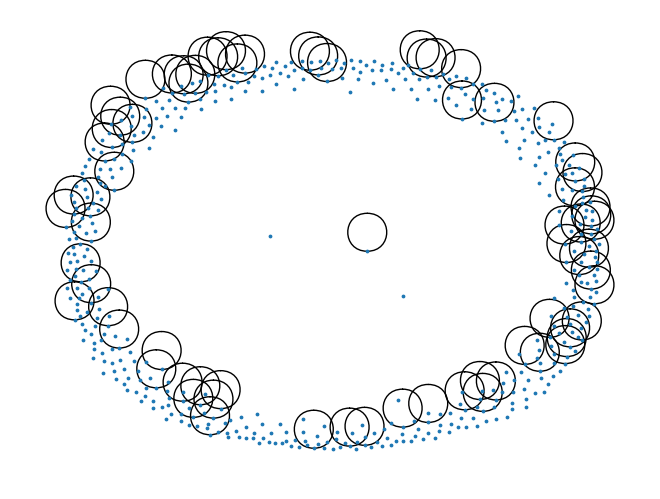

In [103]:
import networkx as nx
import re
import pandas as pd
#create a mention network with the previous function of the dataframe
df = pd.read_csv("C:\\Users\\Jimpo\\Desktop\\SNAgithub\\csvWithSNScrape\\MonaLisaCake_FR\\After\\SubDataframes\\attivistiAfterMonaLisa.csv")

#create a dataframe with user and mentionedUsers
df2 = df[['user', 'mentionedUsers']]
G = nx.Graph()

for i in df2['user']:
    users=re.findall("username': '(.*?)'", i)
    G.add_nodes_from(users)
    #create edges between the users from the mentionedUsers column
    for j in df2['mentionedUsers']:
        #create the connection between the users through the mentions
        G.add_edges_from([(users[0], j)])

nx.draw(G, with_labels=False, node_size=3)

In [90]:
user = []
for i in df2['user'][0:10]:
    user.append(re.findall("username': '(.*?)'", i))
    
for j in user:
    print(j)


['stax7580']
['igorbrickil5S']
['AlekosPrete']
['MeltingPotEU']
['wbfe']
['Simone98RC']
['ettaspin']
['ANPIRomaPosti']
['PAF982']
['Webradio63']
